In [2]:
cd /home/jovyan/Practice_exercise/Madelon/

[Errno 2] No such file or directory: '/home/jovyan/Practice_exercise/Madelon/'
/home/jovyan/Jupyter_Repository/Practice_exercise/Madelon/ipynb


In [3]:
%matplotlib inline
import csv
from sklearn.metrics import roc_auc_score, make_scorer

In [4]:
%run Imports_functions.py
%matplotlib inline

ERROR:root:File `'Imports_functions.py'` not found.


In [1]:
madelon = pd.read_csv('/home/jovyan/Practice_exercise/Madelon/data/madelon.csv', delimiter =',', )
#madelon_train.columns = list(range(501))
madelon.drop('Unnamed: 0', axis= 1, inplace = True)

NameError: name 'pd' is not defined

In [7]:
madelon.set_index('_id', inplace = True)

In [8]:
madelon.head()

,feat_000,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_991,feat_992,feat_993,feat_994,feat_995,feat_996,feat_997,feat_998,feat_999,target
_id,,,,,,,,,,,,,,,,,,,,,
3,0.717731,-0.125490,0.366056,-1.624306,-0.710490,-1.141389,-0.034528,-1.023395,0.587004,0.263354,...,-1.788001,-0.862344,-1.938300,1.528354,-2.054189,-0.050716,-1.112139,-1.144790,1.462363,0
10,-0.675215,0.086776,-2.518189,-0.454617,1.282519,0.202905,-1.196309,0.176143,1.226839,0.440491,...,1.390918,-1.471106,1.275893,0.278696,0.359002,-0.050577,-0.387068,-0.634043,0.778126,1
11,1.499321,0.889471,0.165157,0.631984,0.418684,0.040188,-0.831640,1.407081,0.966045,-0.455713,...,0.167580,-0.790655,-1.511765,0.172055,0.674117,0.682718,1.870969,0.591343,-2.442430,0
25,0.087062,-0.617596,0.345346,0.328586,0.313580,0.243490,0.561365,-1.089277,-0.014853,0.696056,...,-1.780752,-0.406831,1.553864,0.229541,-0.168318,-2.446655,-0.424215,-0.315563,-0.547567,0
76,-0.856826,1.134675,0.036673,-1.639218,-1.130538,-1.361096,0.957973,0.899010,0.360571,-0.851019,...,0.648230,-2.228293,-0.081368,-0.767849,-0.125432,1.127015,-1.545067,-1.052305,-0.002943,0


In [49]:
# target = madelon['target']
# x = madelon.drop('target', axis= 1)

In [50]:
#x.shape, target.shape

## Benchmarking with LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, SVC

In [9]:
#getting 1% of Josh data
madelon_sam = madelon.sample(2000)
target_sam = madelon_sam['target']
x_sam = madelon_sam.drop('target', axis= 1)
#splitting data into xtrain and xtest 

#xtrain, xtest, ytrain, ytest = train_test_split(x_sam, target_sam, test_size = 0.3)

In [10]:
sam1_benchmark_score = benchmark_score(x_sam, target_sam, LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC(probability=True))

In [11]:
sam1_benchmark_score

,"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)","KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')","DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, presort=False, random_state=None, splitter='best')","SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)"
0,0.533724,0.614236,0.703796,0.651159


In [12]:
sam1_benchmark_score.to_pickle('/home/jovyan/Practice_exercise/Madelon/data/sam1_benchmark_score.p')

## Feature Selection by Iterative unsupervised method 
Get R2 for each column. I am going to use DecisionTreeRegressor, KNneighborRegresssor, SVR, SGDRegressor as an estimator and find out features that are important.

In [13]:
DTscore = iterative_score(x_sam, DecisionTreeRegressor)

100%|██████████| 1000/1000 [26:25<00:00,  1.59s/it]


In [14]:
DTscores = pd.DataFrame()
DTscores['Feature'] = DTscore.keys()
DTscores['Score'] = DTscore.values()
DTscores.columns

Index(['Feature', 'Score'], dtype='object')

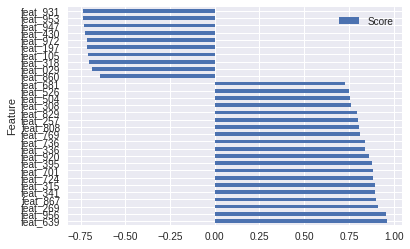

In [16]:
dt_features =DTscores.sort_values('Score',ascending=False).iloc[:30].plot.barh(x='Feature')
dt_features

feature selected:
257,269,308,315,395,341,336,526,504,639,681,724,701,736,769,867,808,829,920,956

## Comparing Covariance between features:
selecting features based on high covariance between them.

In [39]:
x_cov = x_sam.cov().unstack()

In [40]:
x_cov_desc = x_cov.order(kind="quicksort", ascending= False)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: order is deprecated, use sort_values(...)
  """Entry point for launching an IPython kernel.


Features selected: I selected features from first top 100 covariances. I got 18.
257,269,315,395,336,341,639,681,504,526,724,769,736,701,829,867,920,956 

## SelectKBest feature selection

In [41]:
sk = SelectKBest(k=100)
sk.fit(x_sam, target_sam)

SelectKBest(k=100, score_func=<function f_classif at 0x7f506b4fa268>)

In [42]:
sk_df = pd.DataFrame()
sk_df['Feature'] = sk.get_support(indices=True)
sk_df['F-score'] = sk.scores_[sk.get_support(indices=True)]
sk_df['p-values'] = sk.pvalues_[sk.get_support(indices=True)]

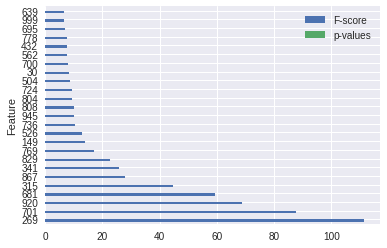

In [43]:
sk_df.sort_values('F-score',ascending=False).iloc[:25].plot.barh(x='Feature')

Features selected based on F-score drop off boundary: 257,269,315,341,336,504,681,701,769,736,829,808,920,974

## Feature selection by RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
rf_pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('clf',RandomForestClassifier(random_state=42))
])

rfparams = {
    'clf__n_estimators':[10, 50,100],
    'clf__max_depth':[10,15,20,25]
}

In [46]:
gs_rf = GridSearchCV(rf_pipe, rfparams, cv= 3, n_jobs= -1)

In [47]:
gs_rf.fit(x_sam, target_sam)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decreas...timators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'clf__n_estimators': [10, 50, 100], 'clf__max_depth': [10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [50]:
rf_feature = gs_rf.best_estimator_.named_steps['clf'].feature_importances_

In [51]:
rf_importance = pd.DataFrame(list(zip(x_sam.columns, rf_feature))).rename(columns={0:'Feature',1:'Importance'})

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


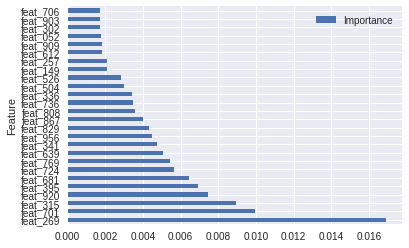

In [52]:
rf_importance.sort('Importance', ascending= False).iloc[:26].plot.barh(x='Feature')

Features selected: 257,269,308,315,336,341,395,504,554,639,681,701,724,736,769,808,829,867,920,956

In [ ]:
# itr_feature = [257,269,308,315,395,341,336,526,504,639,681,724,701,736,769,867,808,829,920,956]
# cov_feature = [257,269,315,395,336,341,504,526,639,681,701,724,769,736,829,867,920,956]
# skb_feature = [257,269,315,341,336,504,681,701,769,736,808,829,920,974]
# rf_features = [257,269,308,315,336,341,395,504,554,639,681,701,724,736,769,808,829,867,920,956]

After comparing all the 4 lists of features, I narrowed down by features which appear in at least 2 of the lists.

In [53]:
sel_feature = [257,269,308,315,336,341,395,504,526,639,681,701,724,736,769,808,829,867,920,956]

In [54]:
madelon_feat_sel = madelon[sel_feature]

In [55]:
madelon_feat_sel['target'] = madelon['target']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [56]:
madelon_feat_sel.head()

,feat_257,feat_269,feat_308,feat_315,feat_336,feat_341,feat_395,feat_504,feat_526,feat_639,...,feat_701,feat_724,feat_736,feat_769,feat_808,feat_829,feat_867,feat_920,feat_956,target
_id,,,,,,,,,,,,,,,,,,,,,
3,-1.381832,2.080511,-0.362144,2.247193,-2.073514,-1.337430,-0.293574,-1.079409,1.860341,-2.603941,...,-3.284469,-0.542681,-0.039577,0.869894,0.508969,-1.037677,2.104805,-0.941140,-2.426835,0
10,2.804338,-1.261676,-2.284742,-1.688563,6.166629,5.007541,2.675419,3.598114,-2.193333,5.421262,...,3.366877,-0.189029,3.222836,-1.297024,-2.030169,4.900942,-3.949524,0.231459,4.389367,1
11,-4.021802,6.399656,-2.697609,5.317607,-0.791241,0.837904,3.671378,-2.514283,1.719510,-4.367107,...,-5.604178,-3.939761,3.528027,-1.654725,0.402188,-3.084444,1.853438,-0.032180,-4.577936,0
25,-1.486031,2.123825,0.812197,0.651382,0.801142,2.933220,2.917487,0.346056,-2.122917,0.424792,...,0.180689,-3.485893,1.095998,-2.832241,0.899736,-0.646875,-0.338827,0.041875,0.203281,0
76,-1.094294,1.716730,0.282536,0.715793,-0.976974,-0.934060,-0.151639,-2.783250,0.472113,-2.172965,...,-1.196585,-0.075236,-0.032043,-1.005800,-0.137620,-2.456573,0.564486,0.816006,-1.708319,0


In [57]:
#pickling the df with selected feature 
madelon_feat_sel.to_pickle('/home/jovyan/Practice_exercise/Madelon/data/madelon_feature_selected.p')